In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense,SimpleRNN
from tensorflow.keras.models import Sequential

In [40]:
df=pd.read_csv("Google_Stock_Price_Train.csv")
df
data=df['Open'].values.reshape(-1,1)

s=MinMaxScaler(feature_range=(0,1))
data=s.fit_transform(data)

In [41]:
xtrain=[]
ytrain=[]
for i in range(60,len(data)):
    xtrain.append(data[i-60:i,0])
    ytrain.append(data[i,0])

xtrain,ytrain=np.array(xtrain),np.array(ytrain)
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],1)

In [42]:
model=Sequential() 
model.add(SimpleRNN(units=50,activation='tanh',return_sequences=False,input_shape=(60,1)))
model.add(Dense(1))

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [45]:
model.fit(xtrain,ytrain,epochs=20,batch_size=32)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.1964
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0027
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0018
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0020
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0017
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0014
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0015
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0018
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0013
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0016
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0011
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0012
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0011
Epoch 15/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.0013
Epoc

In [46]:
ypred=model.predict(xtrain)
ypred=s.inverse_transform(ypred)
ytrain=s.inverse_transform(ytrain.reshape(-1,1))

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


Text(0, 0.5, 'Price')

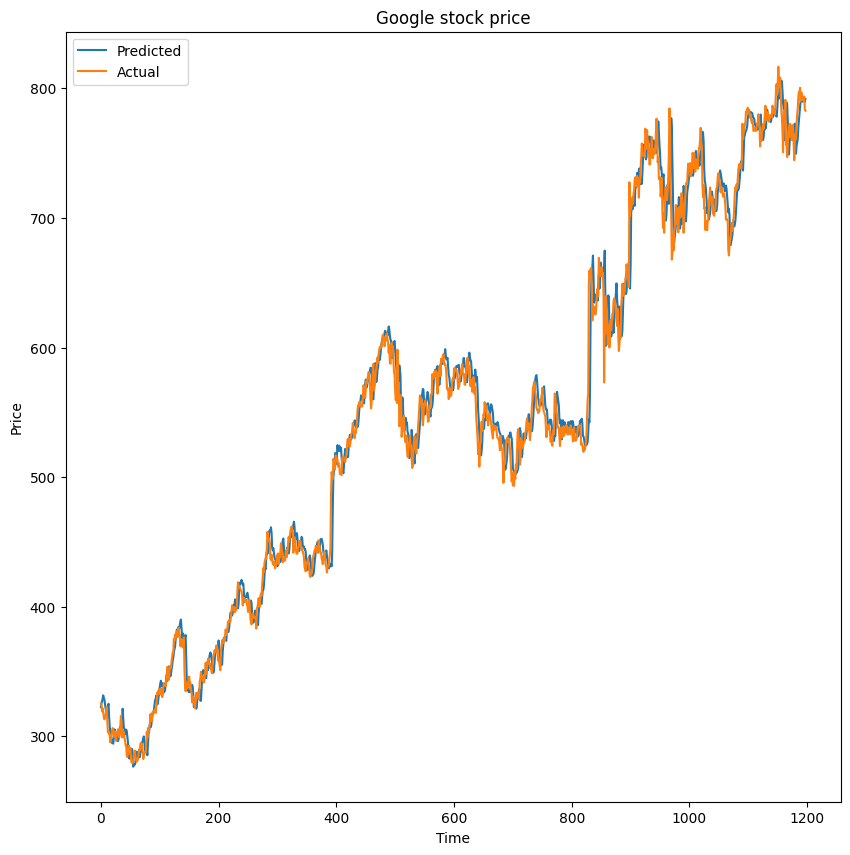

In [47]:
plt.figure(figsize=(10,10),)
plt.plot(ypred,label='Predicted')
plt.plot(ytrain,label='Actual')
plt.legend()
plt.title('Google stock price')
plt.xlabel('Time')
plt.ylabel('Price')